In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df=pd.read_excel('C:\\Users\\Administrator\\Desktop\\数据\\2022  分省城市市政公用设施水平.xls')#读取数据
df

,1-1-2 全国城市市政公用设施水平(2022年),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,地区名称\n\nName of Regions,NaN,人口密度\n(人/\n平方公里)\nPopulation\nDensity\n\n\n(pe...,人均日生\n活用水量\n(升)\nDaily\nWater\nConsumption\nPe...,供 水\n普及率\n(%)\nWater\nCoverage\nRate\n\n\n\n(%),NaN,燃 气\n普及率\n(%)\nGas\nCoverage\nRate\n\n\n\n(%),建成区供水\n管道密度\n(公里/\n平方公里)\nDensity of\nWater Su...,人均道路\n面 积\n(平方米)\nRoad\nSurface\nArea Per\n...,建成区\n路网密度\n(公里/\n平方公里)\nRoad in\nBuilt\nDistri...,...,建成区排水\n管道密度\n(公里/\n平方公里)\nDensity of \nSewers ...,污 水\n处理率\n(%)\nWastewater\nTreatment\nRate\n\...,NaN,城市生活污水集中收集率\n(%)\nCentralized collection rate ...,人均公园\n绿地面积\n(平方米)\nPublic\nRecreational\nGreen...,建成区\n绿 化\n覆盖率\n(%)\nGreen \nCoverage\nRate of...,建成区\n绿地率\n(%)\nGreen Space\nRate of\nBuilt\nDi...,生活垃圾\n处 理 率\n(%)\nDomestic \nGarbage \nTreatme...,NaN,地区名称\nName of \nRegions
2,NaN,NaN,NaN,NaN,NaN,公共供水\n普 及 率\nPublic\nWater\nCoverage\nRate\n\n,NaN,NaN,NaN,NaN,...,NaN,NaN,污水处理厂\n集中处理率\nCentralized \nTreatment \nRate o...,NaN,NaN,NaN,NaN,NaN,生活垃圾\n无 害 化\n处 理 率\nDomestic \nGarbage \nHarml...,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df=pd.read_excel('C:\\Users\\Administrator\\Desktop\\数据\\2022  分省城市市政公用设施水平.xls')#读取数据
df = df.dropna(how='all')#删除全是nan的
df.fillna("0", inplace=True)  # 就地修改
df = df.drop(df.columns[[10, 11]], axis=1)
#合并
df.iloc[0, 5] = df.iloc[1, 5]
df.iloc[0, 13] = df.iloc[1, 13]
df.iloc[0, 19] = df.iloc[1, 19]
df = df.drop(df.index[1])#删掉第二行
# # 将第一行设置为列名
new_columns = df.iloc[0]  # 抓取第一行数据作为新的列名
df.columns = new_columns  # 设置新的列名
# # 删除原来的第一行数据
df = df.drop(df.index[0])
# #删除最后四行
df = df.iloc[:-4]
# 重置索引，因为删除行后索引会不连续
df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2022.xls', index=False, encoding='gbk')

In [4]:
df=pd.read_excel('C:\\Users\\Administrator\\Desktop\\数据\\2021  分省城市市政公用设施水平.xls')#读取数据
df = df.dropna(how='all')#删除全是nan的
df.fillna("0", inplace=True)  # 就地修改
df = df.drop(df.columns[[10, 11]], axis=1)
#合并
df.iloc[0, 5] = df.iloc[1, 5]
df.iloc[0, 13] = df.iloc[1, 13]
df.iloc[0, 19] = df.iloc[1, 19]
df = df.drop(df.index[1])#删掉第二行
# # 将第一行设置为列名
new_columns = df.iloc[0]  # 抓取第一行数据作为新的列名
df.columns = new_columns  # 设置新的列名
# # 删除原来的第一行数据
df = df.drop(df.index[0])
# #删除最后四行
df = df.iloc[:-4]
# 重置索引，因为删除行后索引会不连续
df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2021.xls', index=False, encoding='gbk')

In [5]:
df=pd.read_excel('C:\\Users\\Administrator\\Desktop\\数据\\2020  分省城市市政公用设施水平.xls')#读取数据
df = df.dropna(how='all')#删除全是nan的
df.fillna("0", inplace=True)  # 就地修改
df = df.drop(df.columns[[10, 11]], axis=1)
#合并
df.iloc[0, 5] = df.iloc[1, 5]
df.iloc[0, 13] = df.iloc[1, 13]
df.iloc[0, 18] = df.iloc[1, 18]
df = df.drop(df.index[1])#删掉第二行
# # 将第一行设置为列名
new_columns = df.iloc[0]  # 抓取第一行数据作为新的列名
df.columns = new_columns  # 设置新的列名
# # 删除原来的第一行数据
df = df.drop(df.index[0])
# #删除最后四行
df = df.iloc[:-4]
# 重置索引，因为删除行后索引会不连续
df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2020.xls', index=False, encoding='gbk')

In [61]:
df=pd.read_excel('C:\\Users\\Administrator\\Desktop\\数据\\2019  分省城市市政公用设施水平.xls')#读取数据


df.replace('-', np.nan, inplace=True)



df = df.dropna(how='all')#删除全是nan的
df.fillna("0", inplace=True)  # 就地修改
df = df.drop(df.columns[[10, 11]], axis=1)
#合并
df.iloc[0, 5] = df.iloc[1, 5]
df.iloc[0, 13] = df.iloc[1, 13]
df.iloc[0, 18] = df.iloc[1, 18]
df = df.drop(df.index[1])#删掉第二行
# # 将第一行设置为列名
new_columns = df.iloc[0]  # 抓取第一行数据作为新的列名
df.columns = new_columns  # 设置新的列名
# # 删除原来的第一行数据
df = df.drop(df.index[0])
# #删除最后四行
df = df.iloc[:-4]
# 重置索引，因为删除行后索引会不连续
df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2019.xls', index=False, encoding='gbk')
df

1,地区名称 Name of Regions,0,人口密度 (人/ 平方公里) Population Density (person/ square kilometer),人均日生 活用水量 (升) Daily Water Consumption Per Capita (liter),供 水 普及率 (%) Water Coverage Rate (%),公共供水 普 及 率 Public Water Coverage Rate,燃 气 普及率 (%) Gas Coverage Rate (%),建成区供水 管道密度 (公里/ 平方公里) Density of Water Supply Pipelines in Built District (kilometer/ square kilometer),人均道路 面 积 (平方米) Road Surface Area Per Capita (m2),建成区 路网密度 (公里/ 平方公里) Road in Built District (kilometer/ square kilometer),建成区 道路面积率 (%) Road Surface Area Rate of Built District (%),建成区排水 管道密度 (公里/ 平方公里) Density of Sewers in Built District (kilometer/ square kilometer),污 水 处理率 (%) Wastewater Treatment Rate (%),污水处理厂 集中处理率 Centralized Treatment Rate of Wastewater Treatment Plants,人均公园 绿地面积 (平方米) Public Recreational Green Space Per Capita (m2),建成区 绿 化 覆盖率 (%) Green Coverage Rate of Built District (%),建成区 绿地率 (%) Green Space Rate of Built District (%),生活垃圾 处 理 率 (%) Domestic Garbage Treatment Rate (%),生活垃圾 无 害 化 处 理 率 Domestic Garbage Harmless Treatment Rate,地区名称 Name of Regions
0,全 国,National Total,2613.34,179.965,98.7836,97.1685,97.2944,12.6635,17.3551,6.65245,13.1968,10.4955,96.8053,94.808,14.36,41.51,37.63,99.5958,99.2012,全 国
1,北 京,Beijing,1136.5,168.516,99.0606,92.1051,100,7.47796,7.67721,0,0,6.66417,99.3068,97.0001,16.4,48.46,46.98,99.9756,99.9756,北 京
2,天 津,Tianjin,4939.2,111.248,99.9985,99.9977,100,17.4088,12.9753,6.84189,12.5697,18.8197,95.9743,95.2997,9.20532,37.4771,34.2926,100,100,天 津
3,河 北,Hebei,3062.77,120.72,99.9772,97.4317,99.4577,8.83453,19.9471,7.75682,16.5362,8.7771,98.3358,98.2782,14.2913,42.2841,38.5787,99.9799,99.4339,河 北
4,山 西,Shanxi,3804.49,121.625,99.2773,92.6396,96.4257,9.46738,17.2247,7.07328,15.3869,7.07486,95.7799,95.7799,12.629,42.2859,38.0664,100,100,山 西
5,内 蒙 古,Inner Mongolia,1820.27,104.912,99.2714,96.9915,95.797,8.92839,23.3184,7.31691,16.6138,9.38476,97.4138,97.4138,18.7125,40.5235,37.4138,99.8103,99.8103,内 蒙 古
6,辽 宁,Liaoning,1806.81,148.65,99.1557,97.7818,97.9531,12.6755,15.0614,6.23422,11.6902,7.24801,96.1951,95.9978,11.9678,40.7559,38.304,99.8934,99.4165,辽 宁
7,吉 林,Jilin,1885.01,120.896,94.6997,92.1097,91.802,7.8885,14.1322,3.73666,6.84374,6.0988,95.1887,95.1887,12.5402,39.1816,34.564,98.1358,90.2426,吉 林
8,黑 龙 江,Heilongjiang,5497.84,126.835,98.7913,96.4955,91.085,9.72107,15.2239,7.14361,11.2668,6.76013,92.7807,90.3432,12.4285,36.3948,32.8217,97.8583,95.4858,黑 龙 江
9,上 海,Shanghai,3829.57,207.508,100,100,100,31.4,4.71925,4.43834,9.25718,17.5742,96.2674,93.6532,8.73323,36.8422,35.3087,100,100,上 海


In [7]:
df=pd.read_excel('C:\\Users\\Administrator\\Desktop\\数据\\2018  分省城市市政公用设施水平.xls')#读取数据
df = df.dropna(how='all')#删除全是nan的
df.fillna("0", inplace=True)  # 就地修改
df = df.drop(df.columns[[10, 11]], axis=1)
#合并
df.iloc[0, 5] = df.iloc[1, 5]
df.iloc[0, 13] = df.iloc[1, 13]
df.iloc[0, 18] = df.iloc[1, 18]
df = df.drop(df.index[1])#删掉第二行
# # 将第一行设置为列名
new_columns = df.iloc[0]  # 抓取第一行数据作为新的列名
df.columns = new_columns  # 设置新的列名
# # 删除原来的第一行数据
df = df.drop(df.index[0])
# #删除最后四行
df = df.iloc[:-4]
# 重置索引，因为删除行后索引会不连续
df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2018.xls', index=False, encoding='gbk')

In [8]:
# 确保文件路径正确，使用双反斜杠或原始字符串
df=pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2022.xls')#读取数据
# 列名列表，确保列名数量与数据中的列数量相匹配
columns = ['地区名称', 'National Total', '人口密度', '人均日生活用水量', '供水普及率', '公共供水普及率', '燃气普及率', '建成区供水管道密度', '人均道路面积', '建成区路网密度', '建成区道路面积率', '建成区排水管道密度', '污水处理率', '污水处理厂集中处理率', '城市生活污水集中收集率', '人均公园绿地面积', '建成区绿化覆盖率', '建成区绿地率', '生活垃圾处理率', '生活垃圾无害化处理率','地区名称']

# 确保列名列表的长度与数据中的列数量相匹配
df.columns = columns

# 现在可以对df_2021进行操作了
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2022_1.xls', index=False, encoding='gbk')

In [9]:
# 确保文件路径正确，使用双反斜杠或原始字符串
df=pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2021.xls')#读取数据
# 列名列表，确保列名数量与数据中的列数量相匹配
columns = ['地区名称', 'National Total', '人口密度', '人均日生活用水量', '供水普及率', '公共供水普及率', '燃气普及率', '建成区供水管道密度', '人均道路面积', '建成区路网密度', '建成区道路面积率', '建成区排水管道密度', '污水处理率', '污水处理厂集中处理率', '城市生活污水集中收集率', '人均公园绿地面积', '建成区绿化覆盖率', '建成区绿地率', '生活垃圾处理率', '生活垃圾无害化处理率','地区名称']

# 确保列名列表的长度与数据中的列数量相匹配
df.columns = columns

# 现在可以对df_2021进行操作了
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2021_1.xls', index=False, encoding='gbk')

In [10]:
# 确保文件路径正确，使用双反斜杠或原始字符串
df=pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2020.xls')#读取数据
# 列名列表，确保列名数量与数据中的列数量相匹配
columns = ['地区名称', 'National Total', '人口密度', '人均日生活用水量', '供水普及率', '公共供水普及率', '燃气普及率', '建成区供水管道密度', '人均道路面积', '建成区路网密度', '建成区道路面积率', '建成区排水管道密度', '污水处理率', '污水处理厂集中处理率', '人均公园绿地面积', '建成区绿化覆盖率', '建成区绿地率', '生活垃圾处理率', '生活垃圾无害化处理率','地区名称']

# 确保列名列表的长度与数据中的列数量相匹配
df.columns = columns

# 现在可以对df_2021进行操作了
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2020_1.xls', index=False, encoding='gbk')

In [62]:
# 确保文件路径正确，使用双反斜杠或原始字符串
df=pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2019.xls')#读取数据
# 列名列表，确保列名数量与数据中的列数量相匹配
columns = ['地区名称', 'National Total', '人口密度', '人均日生活用水量', '供水普及率', '公共供水普及率', '燃气普及率', '建成区供水管道密度', '人均道路面积', '建成区路网密度', '建成区道路面积率', '建成区排水管道密度', '污水处理率', '污水处理厂集中处理率', '人均公园绿地面积', '建成区绿化覆盖率', '建成区绿地率', '生活垃圾处理率', '生活垃圾无害化处理率','地区名称']

# 确保列名列表的长度与数据中的列数量相匹配
df.columns = columns

# 现在可以对df_2021进行操作了
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2019_1.xls', index=False, encoding='gbk')

In [12]:
# 确保文件路径正确，使用双反斜杠或原始字符串
df=pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2018.xls')#读取数据
# 列名列表，确保列名数量与数据中的列数量相匹配
columns = ['地区名称', 'National Total', '人口密度', '人均日生活用水量', '供水普及率', '公共供水普及率', '燃气普及率', '建成区供水管道密度', '人均道路面积', '建成区路网密度', '建成区道路面积率', '建成区排水管道密度', '污水处理率', '污水处理厂集中处理率', '人均公园绿地面积', '建成区绿化覆盖率', '建成区绿地率', '生活垃圾处理率', '生活垃圾无害化处理率','地区名称']

# 确保列名列表的长度与数据中的列数量相匹配
df.columns = columns

# 现在可以对df_2021进行操作了
df.to_excel('C:\\Users\Administrator\\Desktop\\data\\2018_1.xls', index=False, encoding='gbk')

In [13]:
# 读取2021年和2022年的数据
df_2022 = pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2022_1.xls')
df_2021 = pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2021_1.xls')
df_2020 = pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2020_1.xls')
df_2019 = pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2019_1.xls')
df_2018 = pd.read_excel('C:\\Users\Administrator\\Desktop\\data\\2018_1.xls')

# 筛选供水普及率的列
df_2022_filtered = df_2022[['地区名称', '供水普及率']]
df_2021_filtered = df_2021[['地区名称', '供水普及率']]
df_2020_filtered = df_2020[['地区名称', '供水普及率']]
df_2019_filtered = df_2019[['地区名称', '供水普及率']]
df_2018_filtered = df_2018[['地区名称', '供水普及率']]


# 合并两个DataFrame
# df_combined = pd.concat([df_2021_filtered, df_2022_filtered], axis=1)
# df_combined = pd.merge(df_2022_filtered, df_2021_filtered,df_2020_filtered,df_2019_filtered,df_2018_filtered on='地区名称')
df_combined = df_2018_filtered.merge(df_2019_filtered, on='地区名称').merge(df_2020_filtered, on='地区名称').merge(df_2021_filtered, on='地区名称').merge(df_2022_filtered, on='地区名称')

# 重命名列以区分年份
df_combined.columns = ['地区名称', '2018年（%）', '2019年（%）', '2020年（%）', '2021年（%）', '2022年（%）']

# 保存到新的Excel文件
df_combined.to_excel('C:\\Users\Administrator\\Desktop\\data\\供水普及率.xls', index=False, encoding='gbk')

print("新的表格已生成并保存为 '供水普及率.xlsx'")

新的表格已生成并保存为 '供水普及率.xlsx'


In [14]:
print(df_combined.columns)

Index(['地区名称', '2018年（%）', '2019年（%）', '2020年（%）', '2021年（%）', '2022年（%）'], dtype='object')


原始列名： Index(['地区名称', '2018年（%）', '2019年（%）', '2020年（%）', '2021年（%）', '2022年（%）'], dtype='object')
调整后的列名： Index(['地区名称', '2022年（%）', '2021年（%）', '2020年（%）', '2019年（%）', '2018年（%）'], dtype='object')


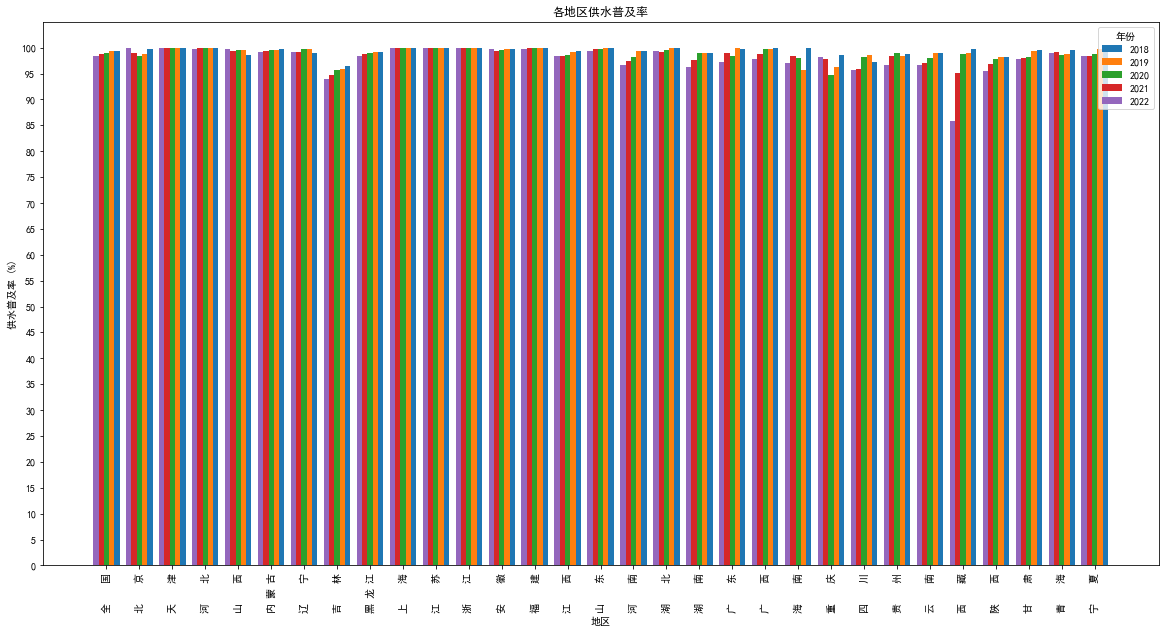

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 读取Excel文件
df = pd.read_excel('C:\\Users\\Administrator\\Desktop\\data\\供水普及率.xls')

# 打印列名，检查正确的列名
print("原始列名：", df.columns)

# 确保列名正确
df.columns = ['地区名称', '2022年（%）', '2021年（%）', '2020年（%）', '2019年（%）', '2018年（%）']
print("调整后的列名：", df.columns)

# 准备数据
data = {
    '年份': [],
    '供水普及率': [],
    '地区名称': []
}

for index, row in df.iterrows():
    years = [2018, 2019, 2020, 2021, 2022]
    for year in years:
        column_name = f'{year}年（%）'
        rate = row.get(column_name, None)
        if rate is not None:
            data['年份'].append(year)
            data['供水普及率'].append(rate)
            data['地区名称'].append(row['地区名称'])

df_data = pd.DataFrame(data)

# 定义一个函数来可视化所有地区的供水普及率
def visualize_water_coverage(df):
    # 获取所有地区和年份
    regions = df['地区名称'].unique()
    years = sorted(df['年份'].unique())
    num_regions = len(regions)
    num_years = len(years)

    # 创建图表
    fig, ax = plt.subplots(figsize=(20, 10))
    width = 0.8 / num_years  # 条形图的宽度

    # 为每个地区和年份绘制条形图
    for i, region in enumerate(regions):
        df_region = df[df['地区名称'] == region]
        offsets = np.linspace(- width * (num_years - 1) / 2, width * (num_years - 1) / 2, num_years)
        for j, year in enumerate(years):
            height = df_region[df_region['年份'] == year]['供水普及率'].values
            if height.size > 0:
                ax.bar(i - offsets[j], height[0], width=width, label=f'{year}' if i == 0 else "", color=plt.cm.tab10(j))

    ax.set_title('各地区供水普及率')
    ax.set_xlabel('地区')
    ax.set_ylabel('供水普及率 (%)')
    ax.set_xticks(np.arange(num_regions))
    ax.set_xticklabels(regions, rotation=90)
    ax.set_yticks(np.arange(0, max(df['供水普及率']) + 5, 5))
    ax.legend(title='年份')

    plt.show()

# 调用函数绘制图表
visualize_water_coverage(df_data)

图表已保存到图片：C:\Users\Administrator\Desktop\data\供水普及率.png
HTML文件已保存到：C:\Users\Administrator\Desktop\data\供水普及率.html


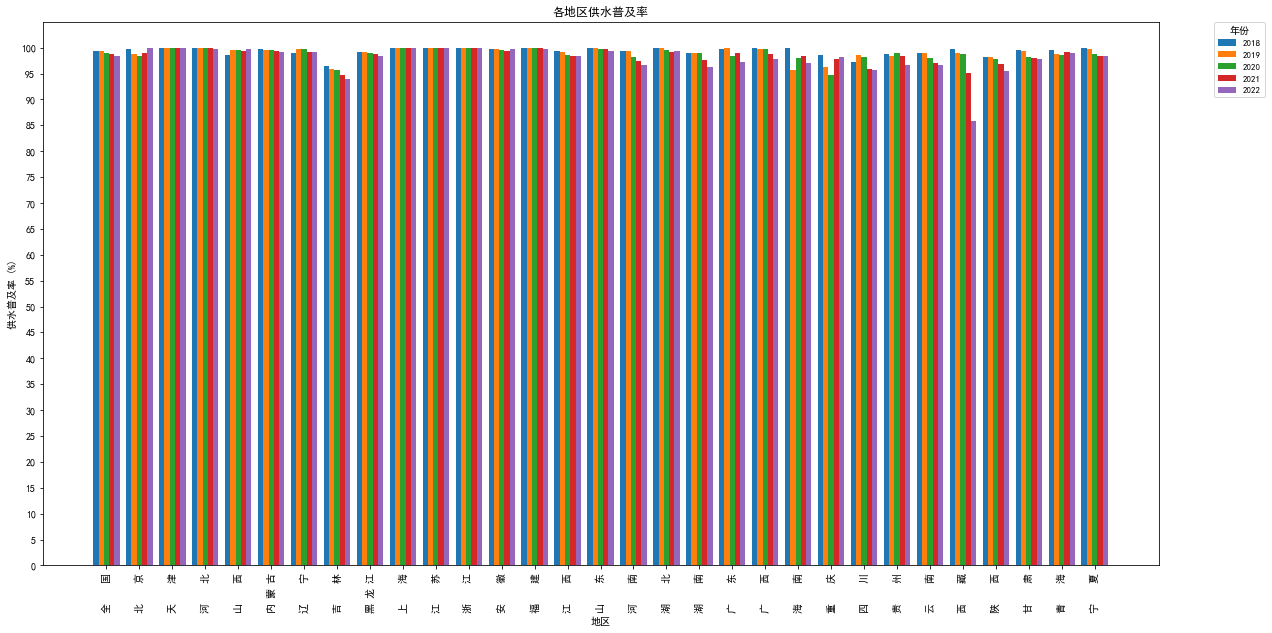

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 读取Excel文件
df = pd.read_excel('C:\\Users\\Administrator\\Desktop\\data\\供水普及率.xls')

# 确保列名正确
df.columns = ['地区名称', '2022年（%）', '2021年（%）', '2020年（%）', '2019年（%）', '2018年（%）']

# 准备数据
data = {
    '年份': [],
    '供水普及率': [],
    '地区名称': []
}

for index, row in df.iterrows():
    years = [2018, 2019, 2020, 2021, 2022]
    for year in years:
        column_name = f'{year}年（%）'
        rate = row.get(column_name, None)
        if rate is not None:
            data['年份'].append(year)
            data['供水普及率'].append(rate)
            data['地区名称'].append(row['地区名称'])

df_data = pd.DataFrame(data)

# 定义一个函数来可视化所有地区的供水普及率
def visualize_water_coverage(df):
    regions = df['地区名称'].unique()
    years = sorted(df['年份'].unique())
    num_regions = len(regions)
    num_years = len(years)

    # 创建图表
    fig, ax = plt.subplots(figsize=(20, 10))
    width = 0.8 / num_years  # 条形图的宽度

    for i, region in enumerate(regions):
        df_region = df[df['地区名称'] == region]
        offsets = np.linspace(- width * (num_years - 1) / 2, width * (num_years - 1) / 2, num_years)
        for j, year in enumerate(years):
            height = df_region[df_region['年份'] == year]['供水普及率'].values
            if height.size > 0:
                ax.bar(i + offsets[j], height[0], width=width, label=f'{year}' if i == 0 else "", color=plt.cm.tab10(j % 10))

    ax.set_title('各地区供水普及率')
    ax.set_xlabel('地区')
    ax.set_ylabel('供水普及率 (%)')
    ax.set_xticks(np.arange(num_regions))
    ax.set_xticklabels(regions, rotation=90)
    ax.set_yticks(np.arange(0, max(df['供水普及率']) + 5, 5))
    ax.legend(title='年份', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=9)

    return fig  # 返回图表对象

# 调用函数绘制图表
fig = visualize_water_coverage(df_data)

# 指定保存图片和HTML文件的路径
image_path = 'C:\\Users\\Administrator\\Desktop\\data\\供水普及率.png'
html_path = 'C:\\Users\\Administrator\\Desktop\\data\\供水普及率.html'

# 将图表保存为图片文件
fig.savefig(image_path)

# 直接在Python脚本中生成HTML内容
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial scale=1.0">
    <title>供水普及率</title>
</head>
<body>
    <h1>各地区供水普及率</h1>
    <img src="{image_path}" alt="供水普及率图表">
</body>
</html>
"""

# 保存HTML文件
with open(html_path, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"图表已保存到图片：{image_path}")
print(f"HTML文件已保存到：{html_path}")

图表已保存到图片：C:\Users\Administrator\Desktop\data\供水普及率预测.png
HTML文件已保存到：C:\Users\Administrator\Desktop\data\供水普及率预测.html


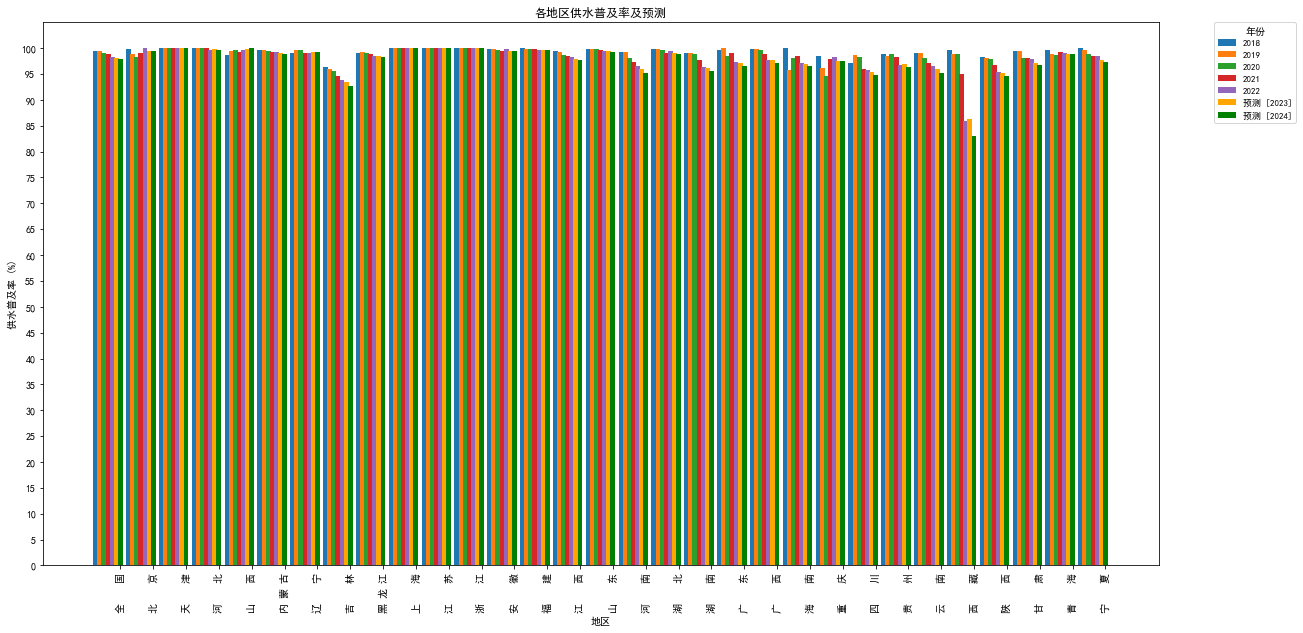

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 设置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 读取Excel文件
df = pd.read_excel('C:\\Users\\Administrator\\Desktop\\data\\供水普及率.xls')

# 打印列名，检查正确的列名
# print("原始列名：", df.columns)

# 确保列名正确
df.columns = ['地区名称', '2022年（%）', '2021年（%）', '2020年（%）', '2019年（%）', '2018年（%）']
# print("调整后的列名：", df.columns)

# 准备数据
data = {
    '年份': [],
    '供水普及率': [],
    '地区名称': []
}

for index, row in df.iterrows():
    years = [2018, 2019, 2020, 2021, 2022]
    for year in years:
        column_name = f'{year}年（%）'
        rate = row.get(column_name, None)
        if rate is not None:
            data['年份'].append(year)
            data['供水普及率'].append(rate)
            data['地区名称'].append(row['地区名称'])

df_data = pd.DataFrame(data)

# 定义一个函数来可视化和预测所有地区的供水普及率
def visualize_and_predict_water_coverage(df):
    regions = df['地区名称'].unique()
    years = sorted(df['年份'].unique())
    num_regions = len(regions)
    num_years = len(years)

    # 创建图表
    fig, ax = plt.subplots(figsize=(20, 10))
    width = 0.15  # 条形图的宽度

    for i, region in enumerate(regions):
        df_region = df[df['地区名称'] == region]
        offsets = np.linspace(-width * num_years / 2, width * num_years / 2, num_years + 2)  # 包含预测年份的offsets
        for j, year in enumerate(years):
            height = df_region[df_region['年份'] == year]['供水普及率'].values
            if height.size > 0:
                ax.bar(i + offsets[j], height[0], width=width, label=f'{year}' if i == 0 else "", color=plt.cm.tab10(j % 10))

        # 训练模型并预测未来两年
        X = df_region['年份'].values.reshape(-1, 1)
        y = df_region['供水普及率'].values
        model = LinearRegression()
        model.fit(X, y)
        future_years = np.array([[2023], [2024]])
        predictions = model.predict(future_years)
        for j, year in enumerate(future_years):
            future_offset = num_years + j
            ax.bar(i + offsets[future_offset], predictions[j], width=width, color='orange' if j == 0 else 'green', label=f'预测 {year}' if i == 0 else "")

    ax.set_title('各地区供水普及率及预测')
    ax.set_xlabel('地区')
    ax.set_ylabel('供水普及率 (%)')
    ax.set_xticks(np.arange(num_regions) + width * num_years / 2)
    ax.set_xticklabels(regions, rotation=90)
    ax.set_yticks(np.arange(0, max(df['供水普及率']) + 5, 5))
    ax.legend(title='年份', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=9)

    return fig  # 返回图表对象

# 调用函数绘制图表并预测
fig = visualize_and_predict_water_coverage(df_data)

# 指定保存图片和HTML文件的路径
image_path = 'C:\\Users\\Administrator\\Desktop\\data\\供水普及率预测.png'
html_path = 'C:\\Users\\Administrator\\Desktop\\data\\供水普及率预测.html'

# 将图表保存为图片文件
fig.savefig(image_path)

# 直接在Python脚本中生成HTML内容
# 直接创建HTML内容字符串
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial scale=1.0">
    <title>供水普及率预测</title>
</head>
<body>
    <h1>各地区供水普及率及预测</h1>
    <img src="{image_path}" alt="供水普及率预测图表">
</body>
</html>
"""

# 保存HTML文件
with open(html_path, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"图表已保存到图片：{image_path}")
print(f"HTML文件已保存到：{html_path}")
# 这个方法直接在Python脚本中生成HTML内容字符串，并将其写入HTML文件，避免了找不到外部HTML模板文件的问题。
# 请确保图片路径和HTML路径正确，并且你的Python环境有权限写入这些路径。

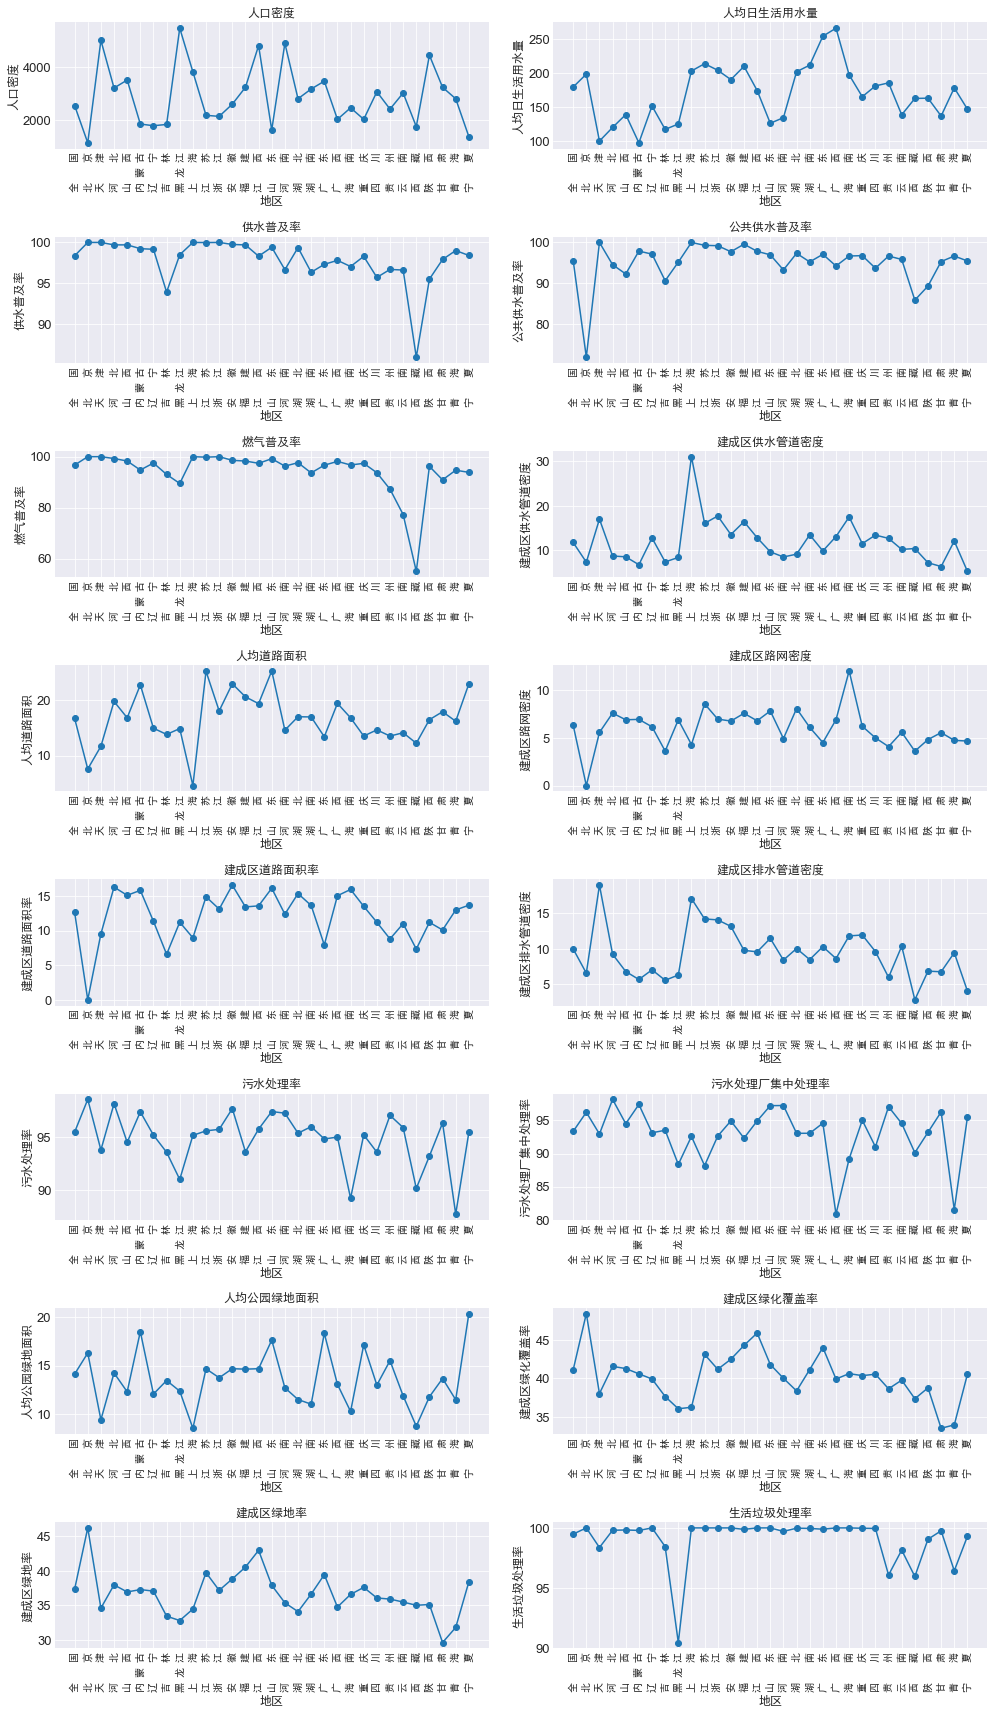

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties

# 读取Excel文件
df = pd.read_excel('C:\\Users\\Administrator\\Desktop\\data\\2018_1.xls')

# 设置支持中文的字体
font_prop = FontProperties(fname='C:\\Windows\\Fonts\\simhei.ttf', size=12)

# 设置全局字体和负号显示
# plt.rcParams['font.family'] = 'SimHei'
# plt.rcParams['axes.unicode_minus'] = False

# 设置绘图风格
plt.style.use('seaborn-darkgrid')

# 创建一个画布，可以容纳多个子图
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 24))
axes = axes.flatten()  # 将二维数组扁平化处理

# 定义要绘制的指标列表
metrics = [
    '人口密度', '人均日生活用水量', '供水普及率',
    '公共供水普及率', '燃气普及率', '建成区供水管道密度',
    '人均道路面积', '建成区路网密度', '建成区道路面积率',
    '建成区排水管道密度', '污水处理率', '污水处理厂集中处理率',
    '人均公园绿地面积', '建成区绿化覆盖率', '建成区绿地率',
    '生活垃圾处理率', '生活垃圾无害化处理率'
]

# 绘制折线图
for i, metric in enumerate(metrics):
    if i >= len(axes):  # 检查索引是否越界
        break
    ax = axes[i]  # 获取子图对象
    ax.plot(df['地区名称.1'], df[metric], marker='o')  # 绘制折线图
    ax.set_title(metric, fontproperties=font_prop)  # 设置标题
    ax.set_xlabel('地区', fontproperties=font_prop)  # 设置x轴标签
    ax.set_ylabel(metric, fontproperties=font_prop)  # 设置y轴标签

    ax.set_xticks(range(len(df['地区名称.1'])))  # 设置x轴刻度位置
    ax.set_xticklabels(df['地区名称.1'], rotation=90, fontproperties=font_prop)  # 设置x轴刻度标签
    ax.tick_params(axis='x', labelsize=10)  # 设置x轴刻度标签大小

# 隐藏多余的子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 调整子图间距
plt.tight_layout()

# 显示图表
plt.show()

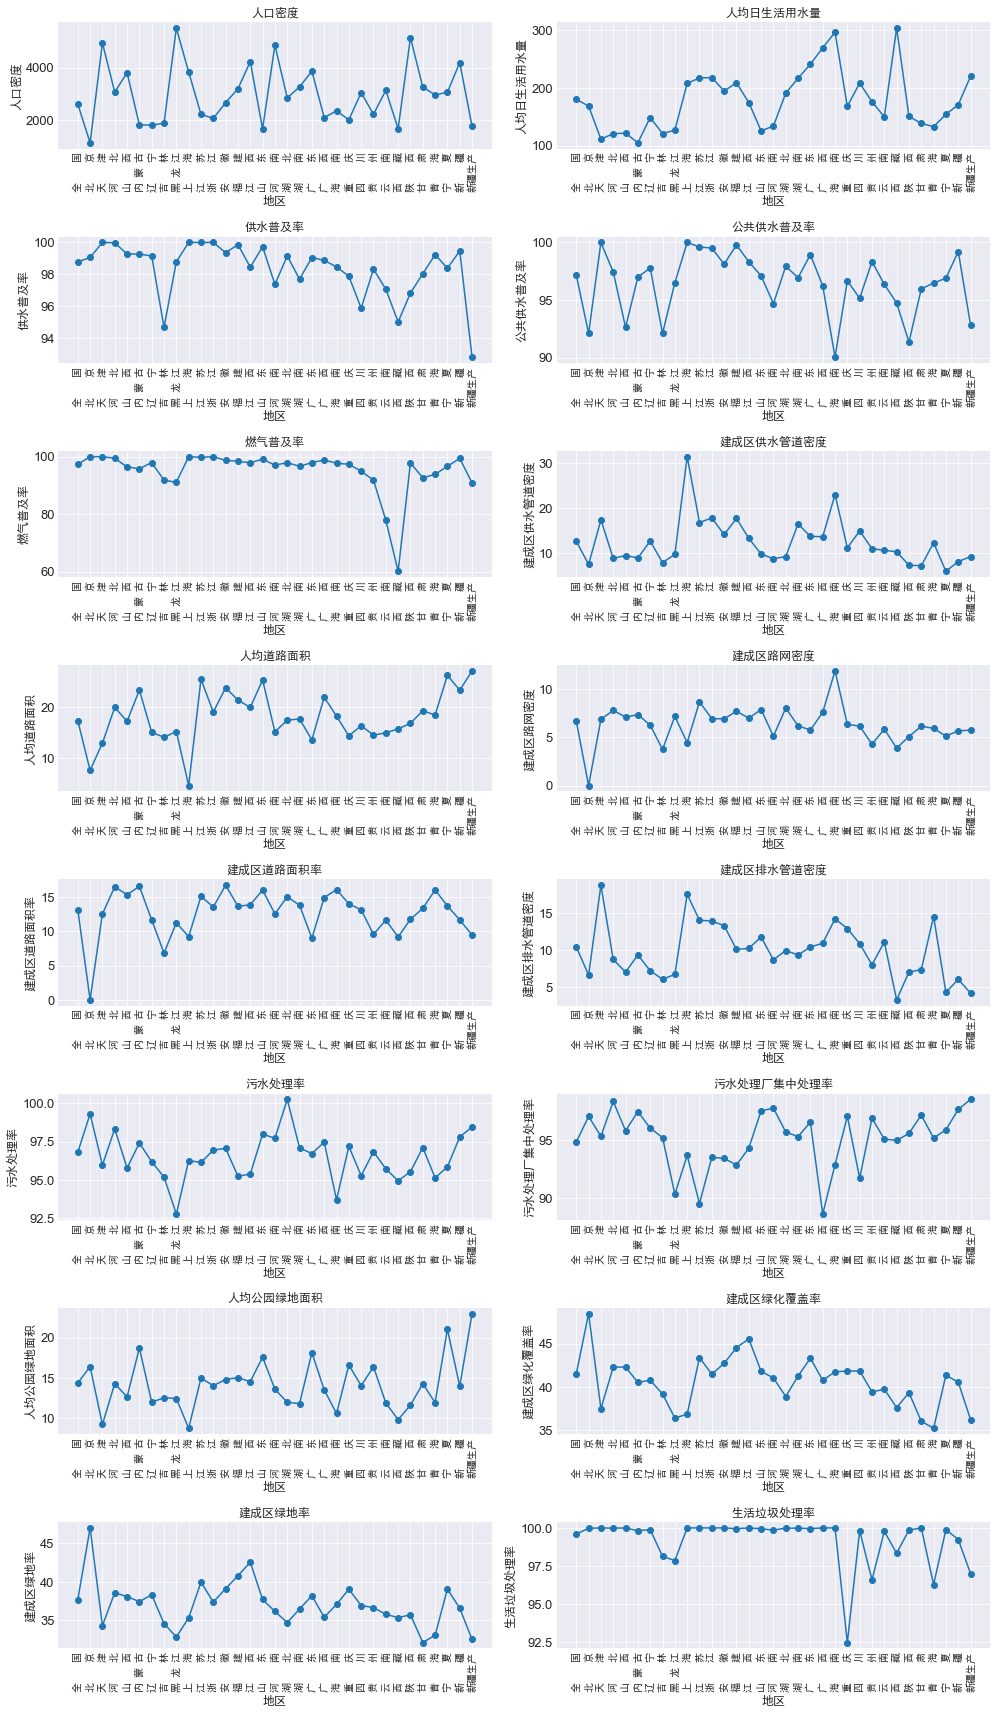

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties

# 读取Excel文件
df = pd.read_excel('C:\\Users\\Administrator\\Desktop\\data\\2019_1.xls')

# 设置支持中文的字体
font_prop = FontProperties(fname='C:\\Windows\\Fonts\\simhei.ttf', size=12)

# 设置全局字体和负号显示
# plt.rcParams['font.family'] = 'SimHei'
# plt.rcParams['axes.unicode_minus'] = False

# 设置绘图风格
plt.style.use('seaborn-darkgrid')

# 创建一个画布，可以容纳多个子图
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 24))
axes = axes.flatten()  # 将二维数组扁平化处理

# 定义要绘制的指标列表
metrics = [
    '人口密度', '人均日生活用水量', '供水普及率',
    '公共供水普及率', '燃气普及率', '建成区供水管道密度',
    '人均道路面积', '建成区路网密度', '建成区道路面积率',
    '建成区排水管道密度', '污水处理率', '污水处理厂集中处理率',
    '人均公园绿地面积', '建成区绿化覆盖率', '建成区绿地率',
    '生活垃圾处理率', '生活垃圾无害化处理率'
]

# 绘制折线图
for i, metric in enumerate(metrics):
    if i >= len(axes):  # 检查索引是否越界
        break
    ax = axes[i]  # 获取子图对象
    ax.plot(df['地区名称.1'], df[metric], marker='o')  # 绘制折线图
    ax.set_title(metric, fontproperties=font_prop)  # 设置标题
    ax.set_xlabel('地区', fontproperties=font_prop)  # 设置x轴标签
    ax.set_ylabel(metric, fontproperties=font_prop)  # 设置y轴标签

    ax.set_xticks(range(len(df['地区名称.1'])))  # 设置x轴刻度位置
    ax.set_xticklabels(df['地区名称.1'], rotation=90, fontproperties=font_prop)  # 设置x轴刻度标签
    ax.tick_params(axis='x', labelsize=10)  # 设置x轴刻度标签大小

# 隐藏多余的子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 调整子图间距
plt.tight_layout()

# 显示图表
plt.show()